In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from pandas_datareader import data as pdr
from pandas.plotting import scatter_matrix

In [258]:
read_file = pd.read_excel ("athlete_events.xlsx")
# Write the dataframe object
# into csv file
read_file.to_csv ("athlete_events.csv", 
                  index = None,
                  header=True)
# read csv file and convert 
# into a dataframe object
dfhw1 = pd.DataFrame(pd.read_csv("athlete_events.csv"))
# show the dataframe
dfhw1 = dfhw1.dropna()
dfhw1.head()

ID                      Name Sex   Age  Height  Weight     Team  NOC  \
40  16  Juhamatti Tapio Aaltonen   M  28.0   184.0    85.0  Finland  FIN   
41  17   Paavo Johannes Aaltonen   M  28.0   175.0    64.0  Finland  FIN   
42  17   Paavo Johannes Aaltonen   M  28.0   175.0    64.0  Finland  FIN   
44  17   Paavo Johannes Aaltonen   M  28.0   175.0    64.0  Finland  FIN   
48  17   Paavo Johannes Aaltonen   M  28.0   175.0    64.0  Finland  FIN   

          Games  Year  Season    City       Sport  \
40  2014 Winter  2014  Winter   Sochi  Ice Hockey   
41  1948 Summer  1948  Summer  London  Gymnastics   
42  1948 Summer  1948  Summer  London  Gymnastics   
44  1948 Summer  1948  Summer  London  Gymnastics   
48  1948 Summer  1948  Summer  London  Gymnastics   

                                     Event   Medal  
40             Ice Hockey Men's Ice Hockey  Bronze  
41  Gymnastics Men's Individual All-Around  Bronze  
42        Gymnastics Men's Team All-Around    Gold  
44            Gymnastics Men's Horse Vault    Gold  
48        Gymnastics Men's Pommelled Horse    Gold

In [49]:
dfhw1.describe()

ID           Age        Height        Weight          Year
count   30181.000000  30181.000000  30181.000000  30181.000000  30181.000000
mean    70225.949604     25.429012    177.642358     73.753554   1988.005964
std     38839.720551      5.049684     10.924188     15.004992     22.718451
min        16.000000     13.000000    136.000000     28.000000   1896.000000
25%     37494.000000     22.000000    170.000000     63.000000   1976.000000
50%     69771.000000     25.000000    178.000000     73.000000   1992.000000
75%    104111.000000     28.000000    185.000000     83.000000   2006.000000
max    135563.000000     66.000000    223.000000    182.000000   2016.000000

In [ ]:
#Describing data
#GAMES --> year,season,city,sport
#MEDAL ---> gold,silver,bronze
#ATHLETE(str) ---> name,age(float),sex,height(float)
#NOC --> region

In [50]:
dfhw1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30181 entries, 40 to 271103
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30181 non-null  int64  
 1   Name    30181 non-null  object 
 2   Sex     30181 non-null  object 
 3   Age     30181 non-null  float64
 4   Height  30181 non-null  float64
 5   Weight  30181 non-null  float64
 6   Team    30181 non-null  object 
 7   NOC     30181 non-null  object 
 8   Games   30181 non-null  object 
 9   Year    30181 non-null  int64  
 10  Season  30181 non-null  object 
 11  City    30181 non-null  object 
 12  Sport   30181 non-null  object 
 13  Event   30181 non-null  object 
 14  Medal   30181 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 3.7+ MB


In [246]:
#Now I will sort medal types and I will plot medal type distribution versus ages
dfhw1gold = pd.DataFrame()
dfhw1gold = dfhw1.loc[dfhw1['Medal'].isin(['Gold'])].value_counts()
dfhw1silver = pd.DataFrame()
dfhw1silver = dfhw1.loc[dfhw1['Medal'].isin(['Silver'])].value_counts()
dfhw1bronze = pd.DataFrame()
dfhw1bronze = dfhw1.loc[dfhw1['Medal'].isin(['Bronze'])].value_counts()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


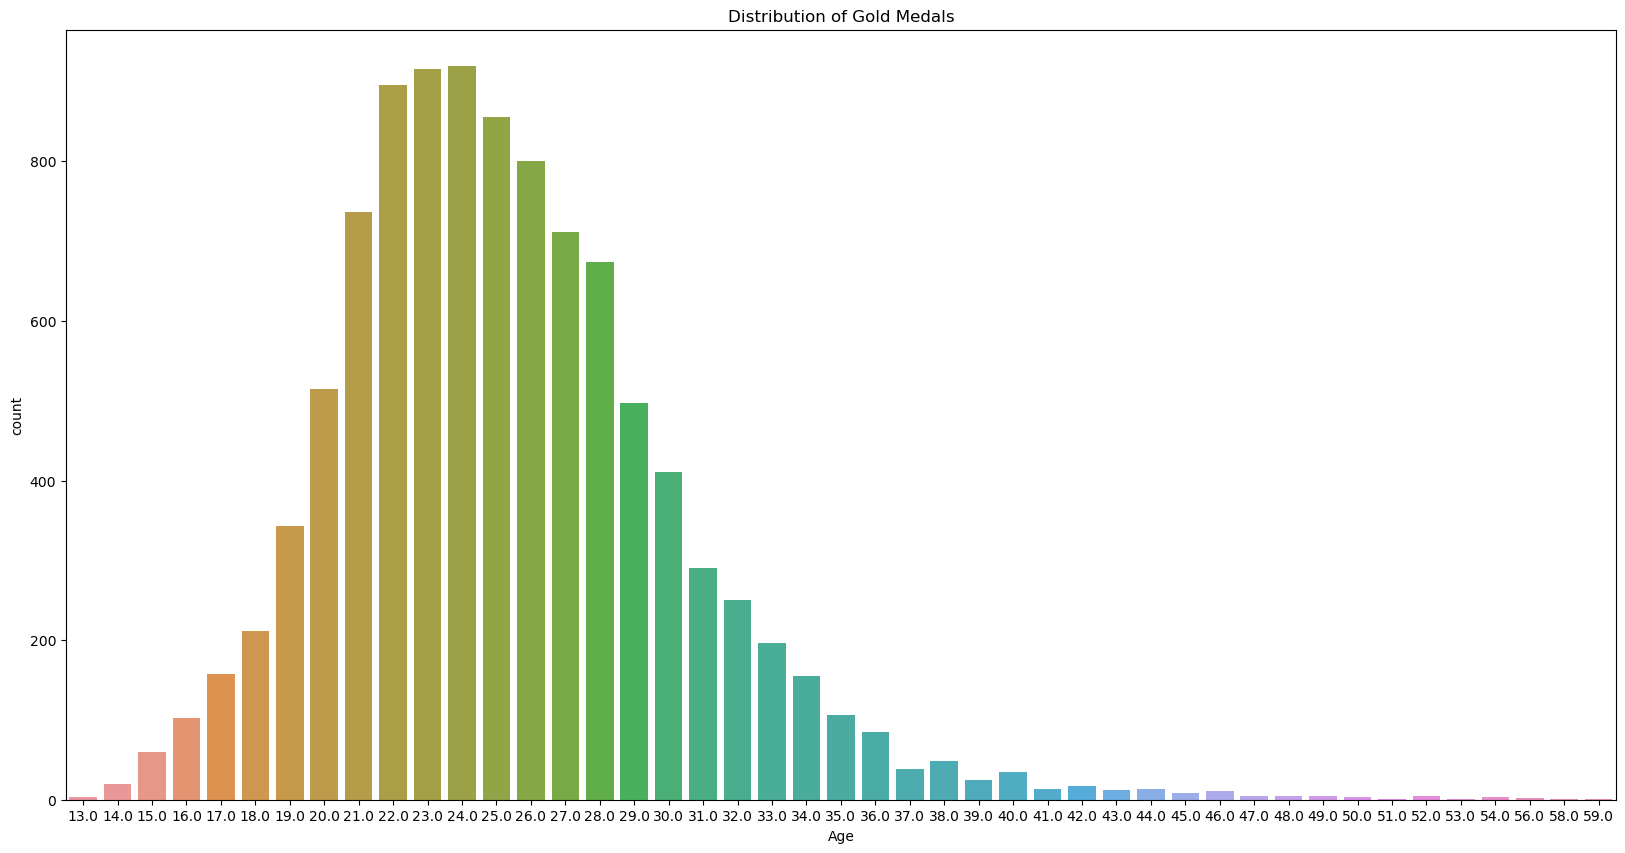

In [52]:
#Gold medals / Age
plt.figure(figsize=(20, 10))
plt.title('Distribution of Gold Medals')
sns.countplot(dfhw1gold['Age'])
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


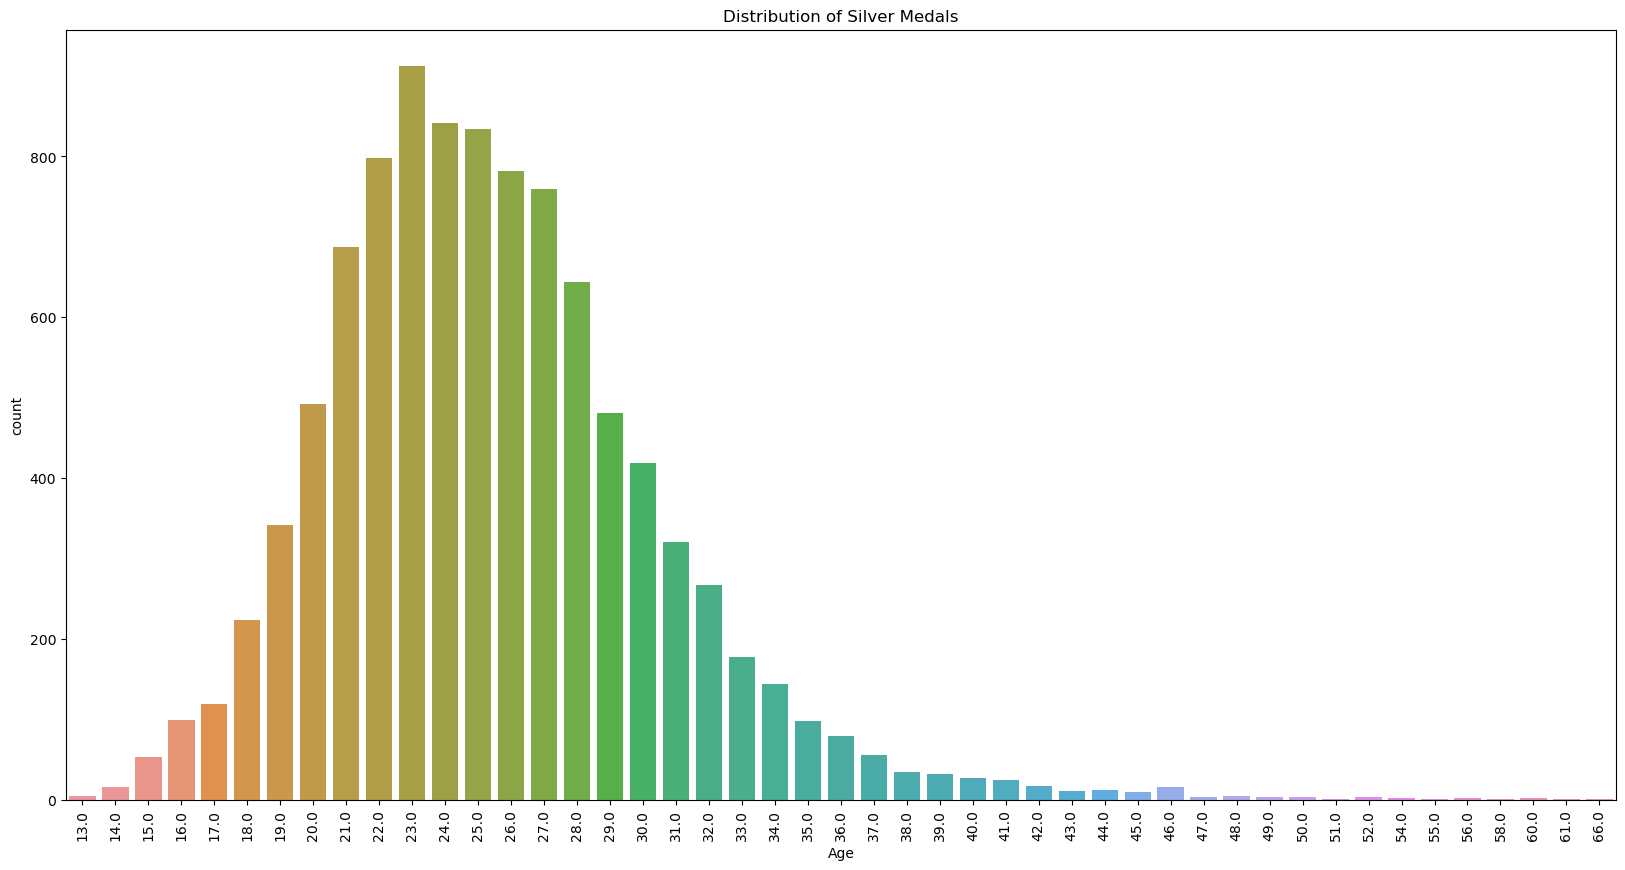

In [53]:
#Silver medal distribution per age
plt.figure(figsize=(20,10))
plt.title('Distribution of Silver Medals')
sns.countplot(dfhw1silver['Age'])
plt.xticks(rotation=90)
plt.show()

In [54]:
#Bronze medal / Age
plt.figure(figsize=(20,10))
plt.title('Distribution of Bronze Medals')
sns.countplot(dfhw1bronze['Age'])
plt.xticks(rotation=90)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [226]:
#Total age distribution / athletes
plt.figure(figsize=(20,10))
sns.set(style='whitegrid',)
sns.histplot([dfhw1["Age"]], kde=True)
plt.xlabel("Age of athletes",fontsize=14, weight="bold")
plt.ylabel("Density",fontsize=15, weight="bold")
plt.show()

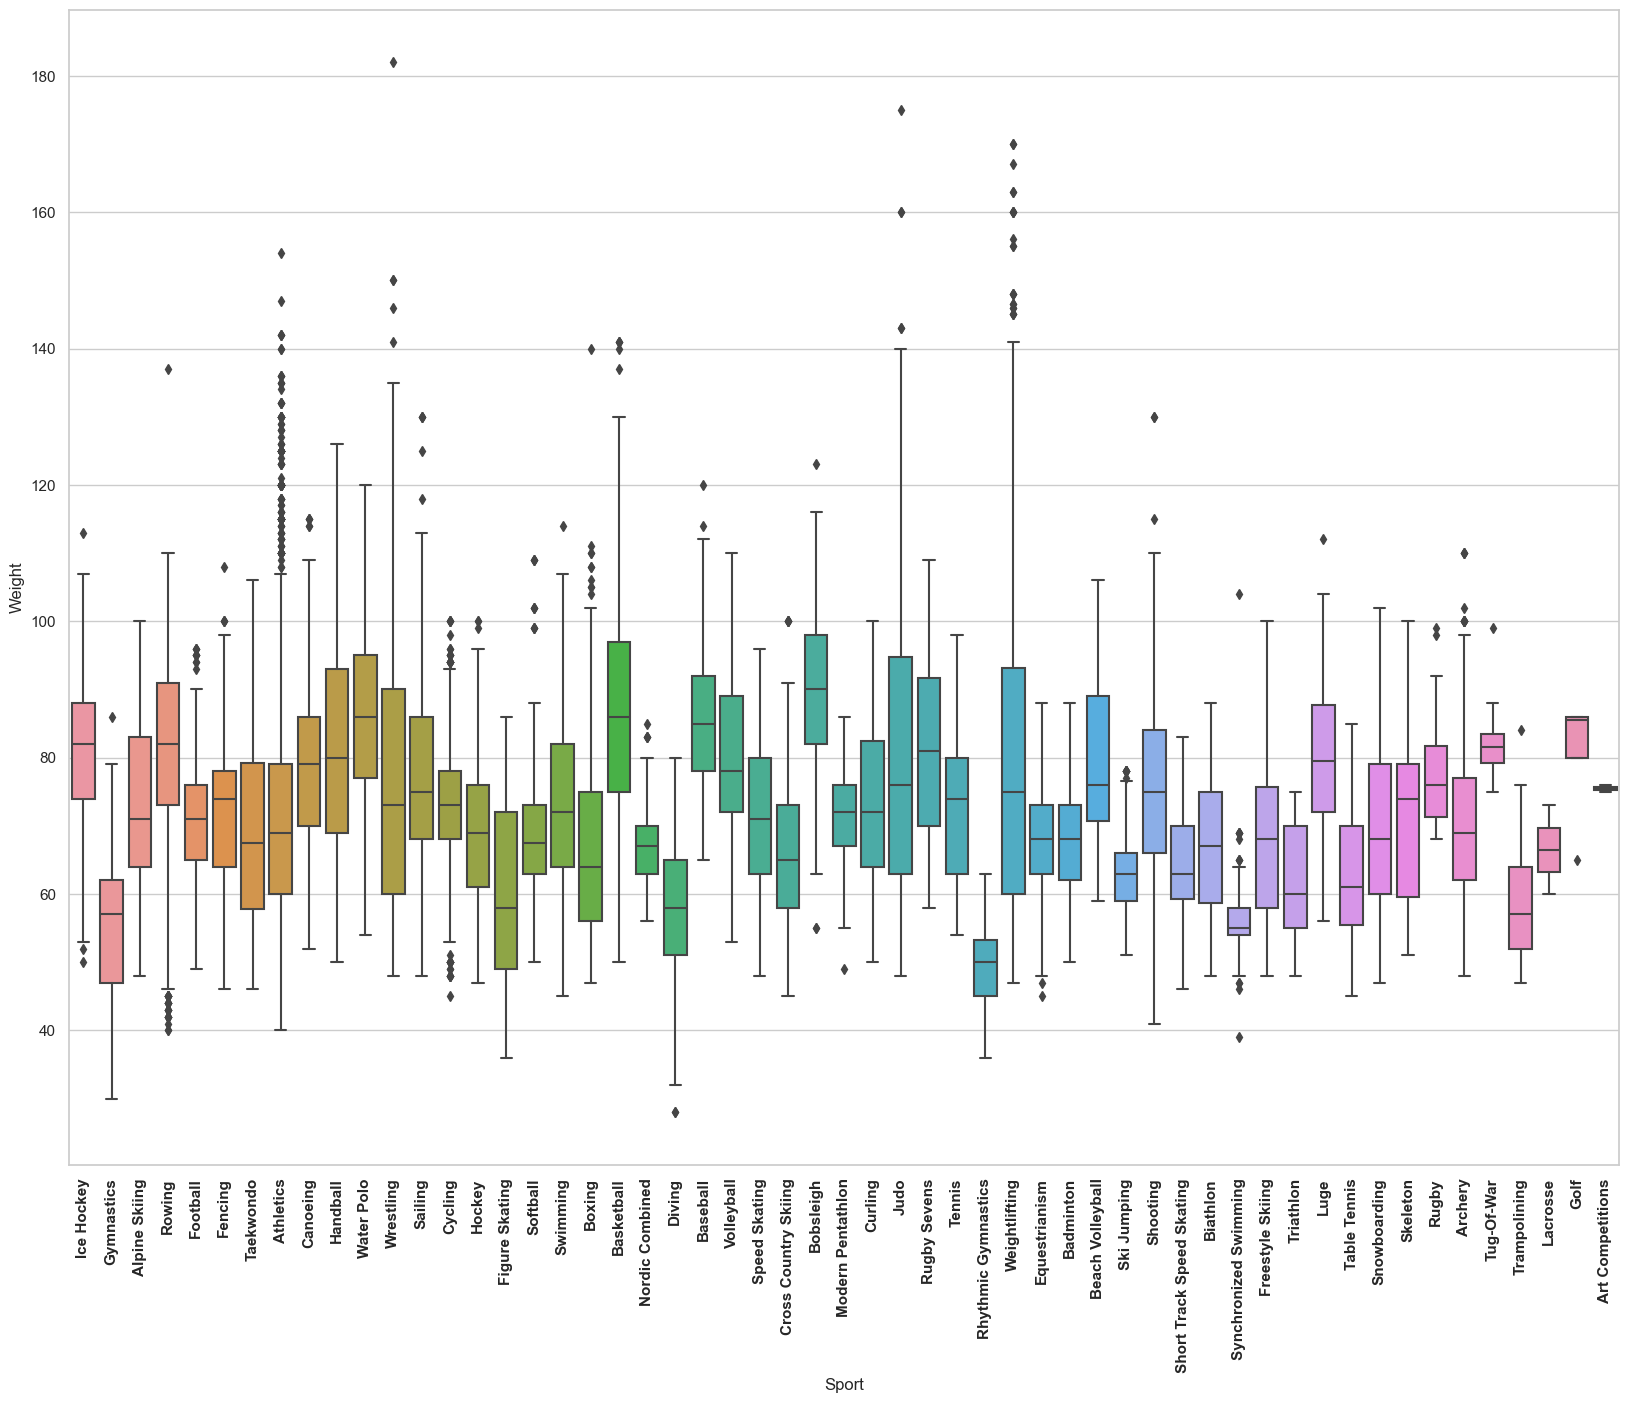

In [260]:
plt.figure(figsize=(20,15))
sns.set(style="whitegrid",)
sns.boxplot(data=dfhw1, x="Sport", y="Weight")
plt.xticks(rotation=90, weight="bold")
plt.show()

In [55]:
#Data sorting per gender
dfhw1m = dfhw1.loc[dfhw1['Sex'].isin(['M'])]
dfhw1f = dfhw1.loc[dfhw1['Sex'].isin(['F'])]
dfhw1f.head()

ID                                     Name Sex   Age  Height  Weight  \
105   37                       Ann Kristin Aarnes   F  23.0   182.0    64.0   
161   65                        Patimat Abakarova   F  21.0   165.0    49.0   
163   67  Mariya Vasilyevna Abakumova (-Tarabina)   F  22.0   179.0    80.0   
195   90                Tamila Rashidovna Abasova   F  21.0   163.0    60.0   
286  153                    Monica Cecilia Abbott   F  23.0   191.0    88.0   

              Team  NOC        Games  Year  Season            City      Sport  \
105         Norway  NOR  1996 Summer  1996  Summer         Atlanta   Football   
161     Azerbaijan  AZE  2016 Summer  2016  Summer  Rio de Janeiro  Taekwondo   
163         Russia  RUS  2008 Summer  2008  Summer         Beijing  Athletics   
195         Russia  RUS  2004 Summer  2004  Summer          Athina    Cycling   
286  United States  USA  2008 Summer  2008  Summer         Beijing   Softball   

                               Event   Medal  
105        Football Women's Football  Bronze  
161      Taekwondo Women's Flyweight  Bronze  
163  Athletics Women's Javelin Throw  Silver  
195           Cycling Women's Sprint  Silver  
286        Softball Women's Softball  Silver

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Distribution of Gold Medals for Male'}, xlabel='Year', ylabel='count'>

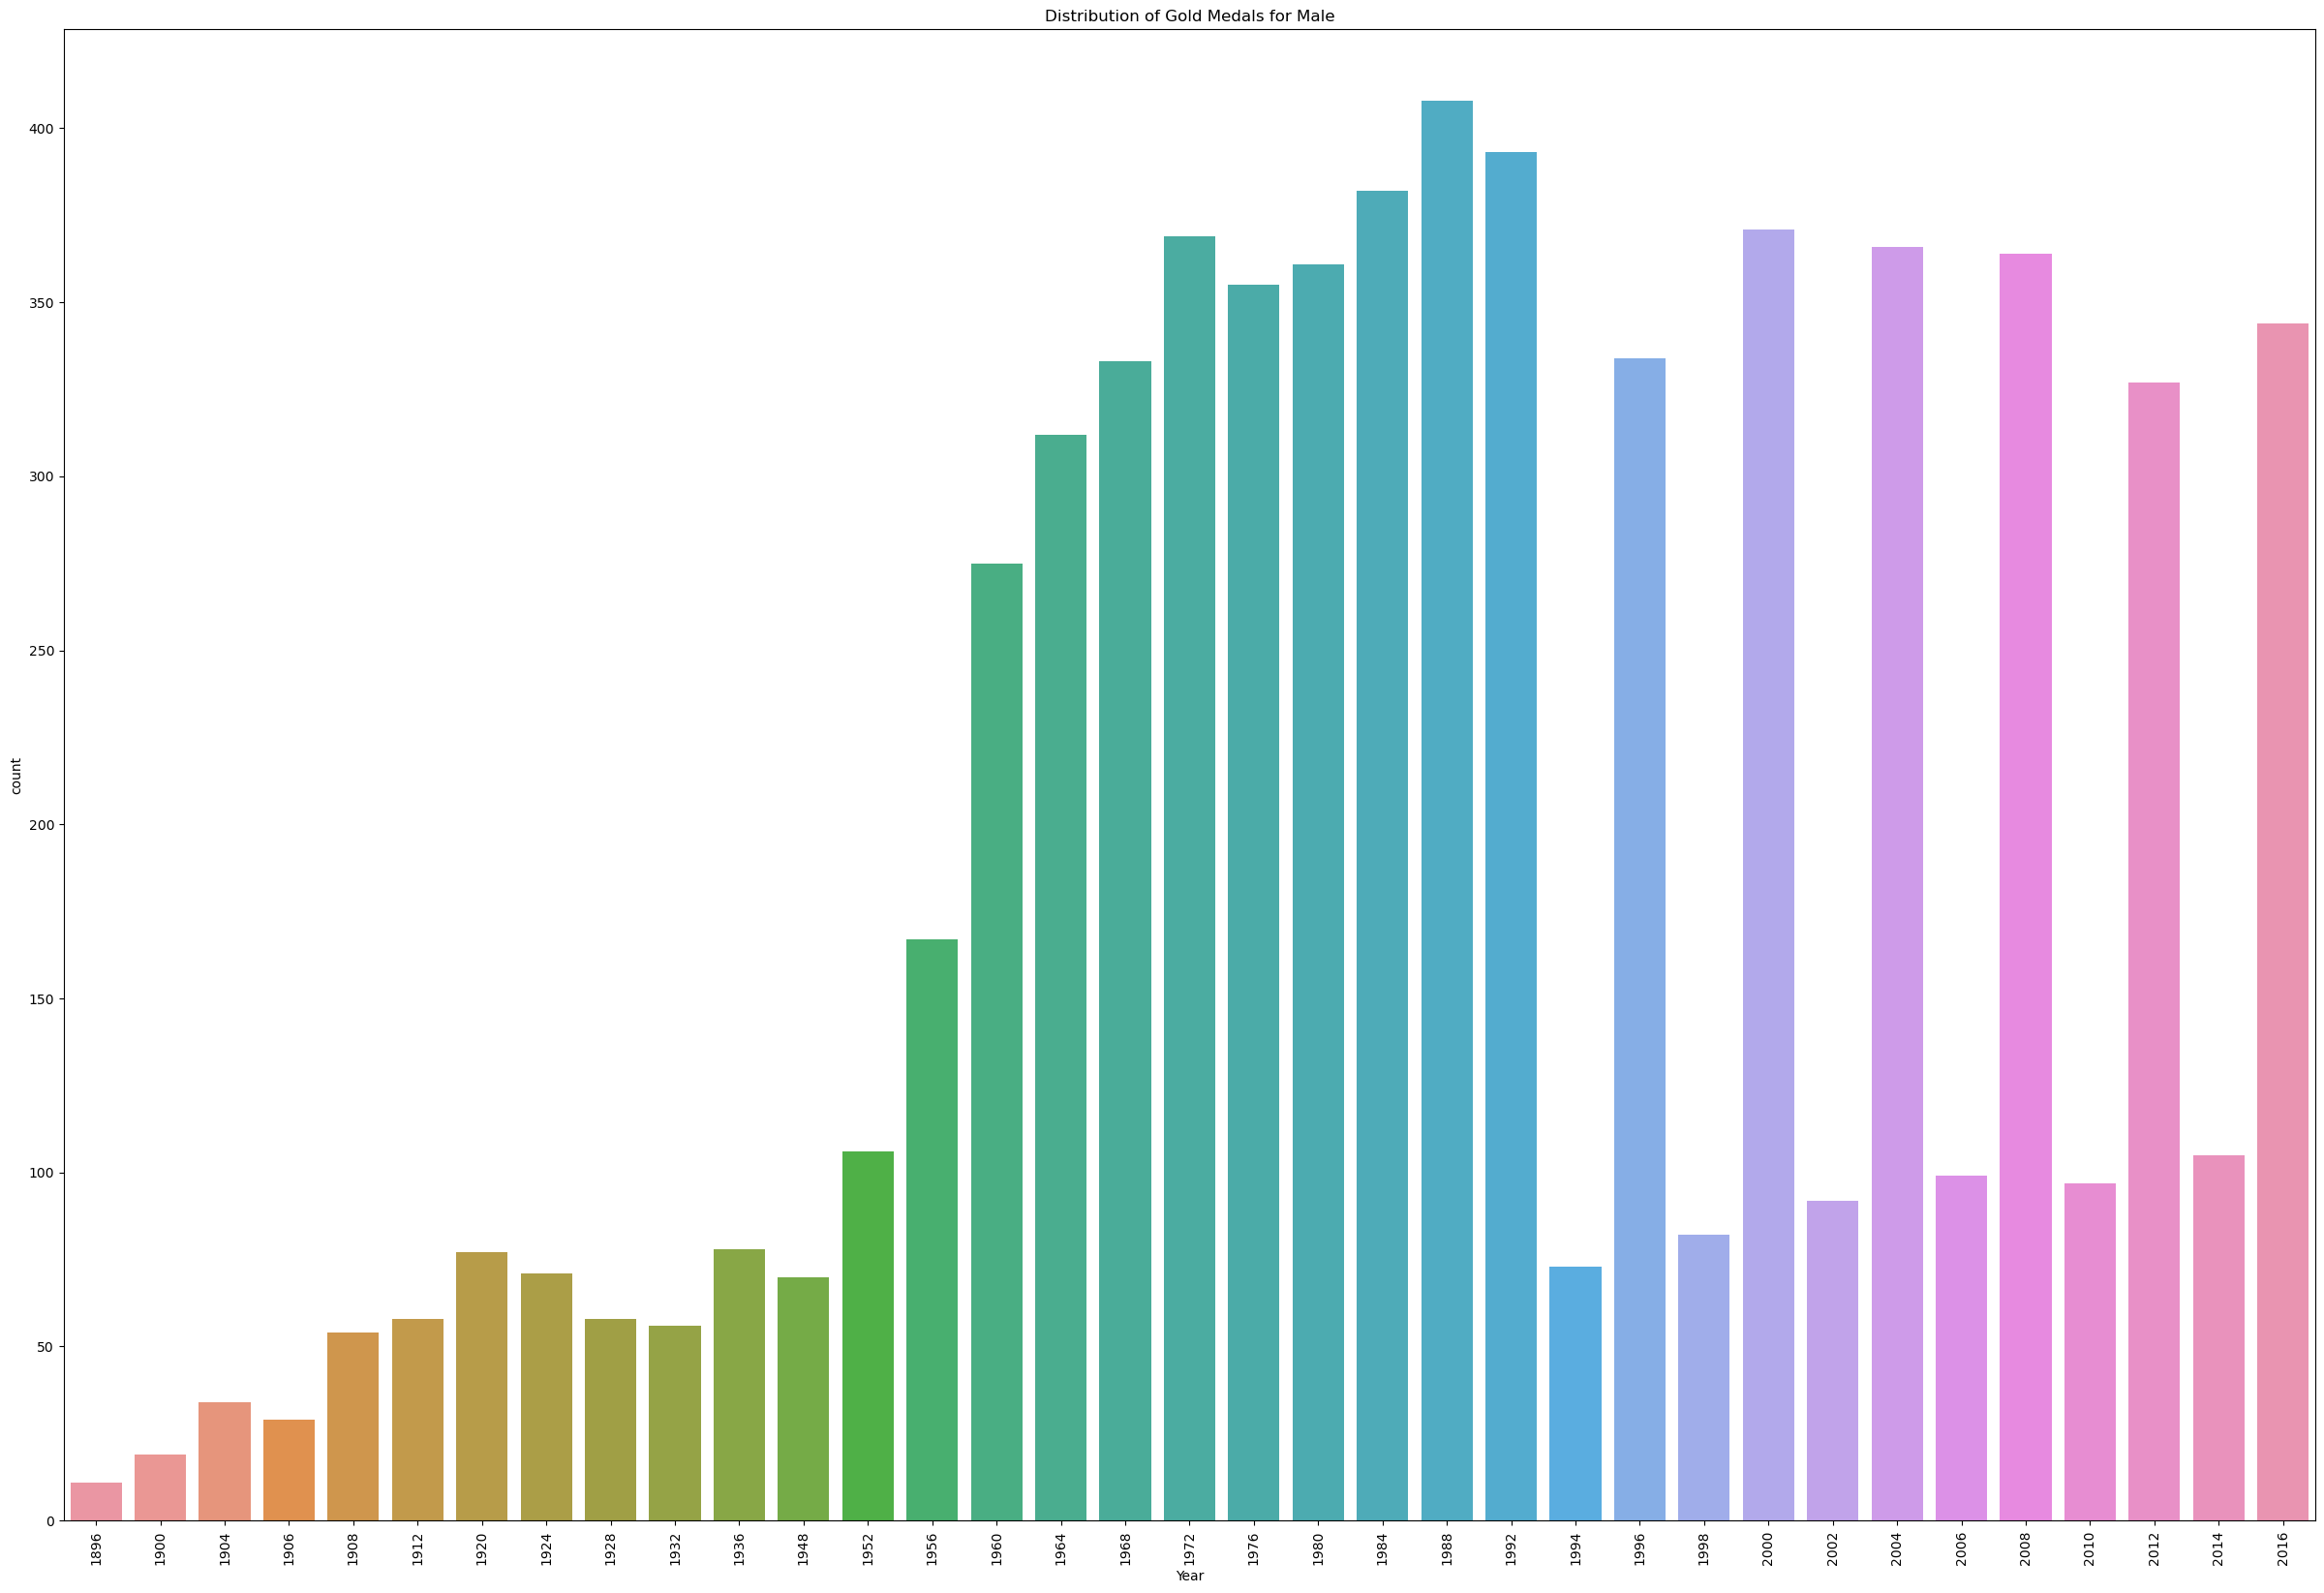

In [31]:
dfhw1mgold = dfhw1m['Year'][(dfhw1m['Medal']=='Gold')]
plt.figure(figsize=(30,20))
plt.title('Distribution of Gold Medals for Male')
plt.xticks(rotation=90)
sns.countplot(dfhw1mgold)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Distribution of Medals for Female'}, xlabel='Year', ylabel='count'>

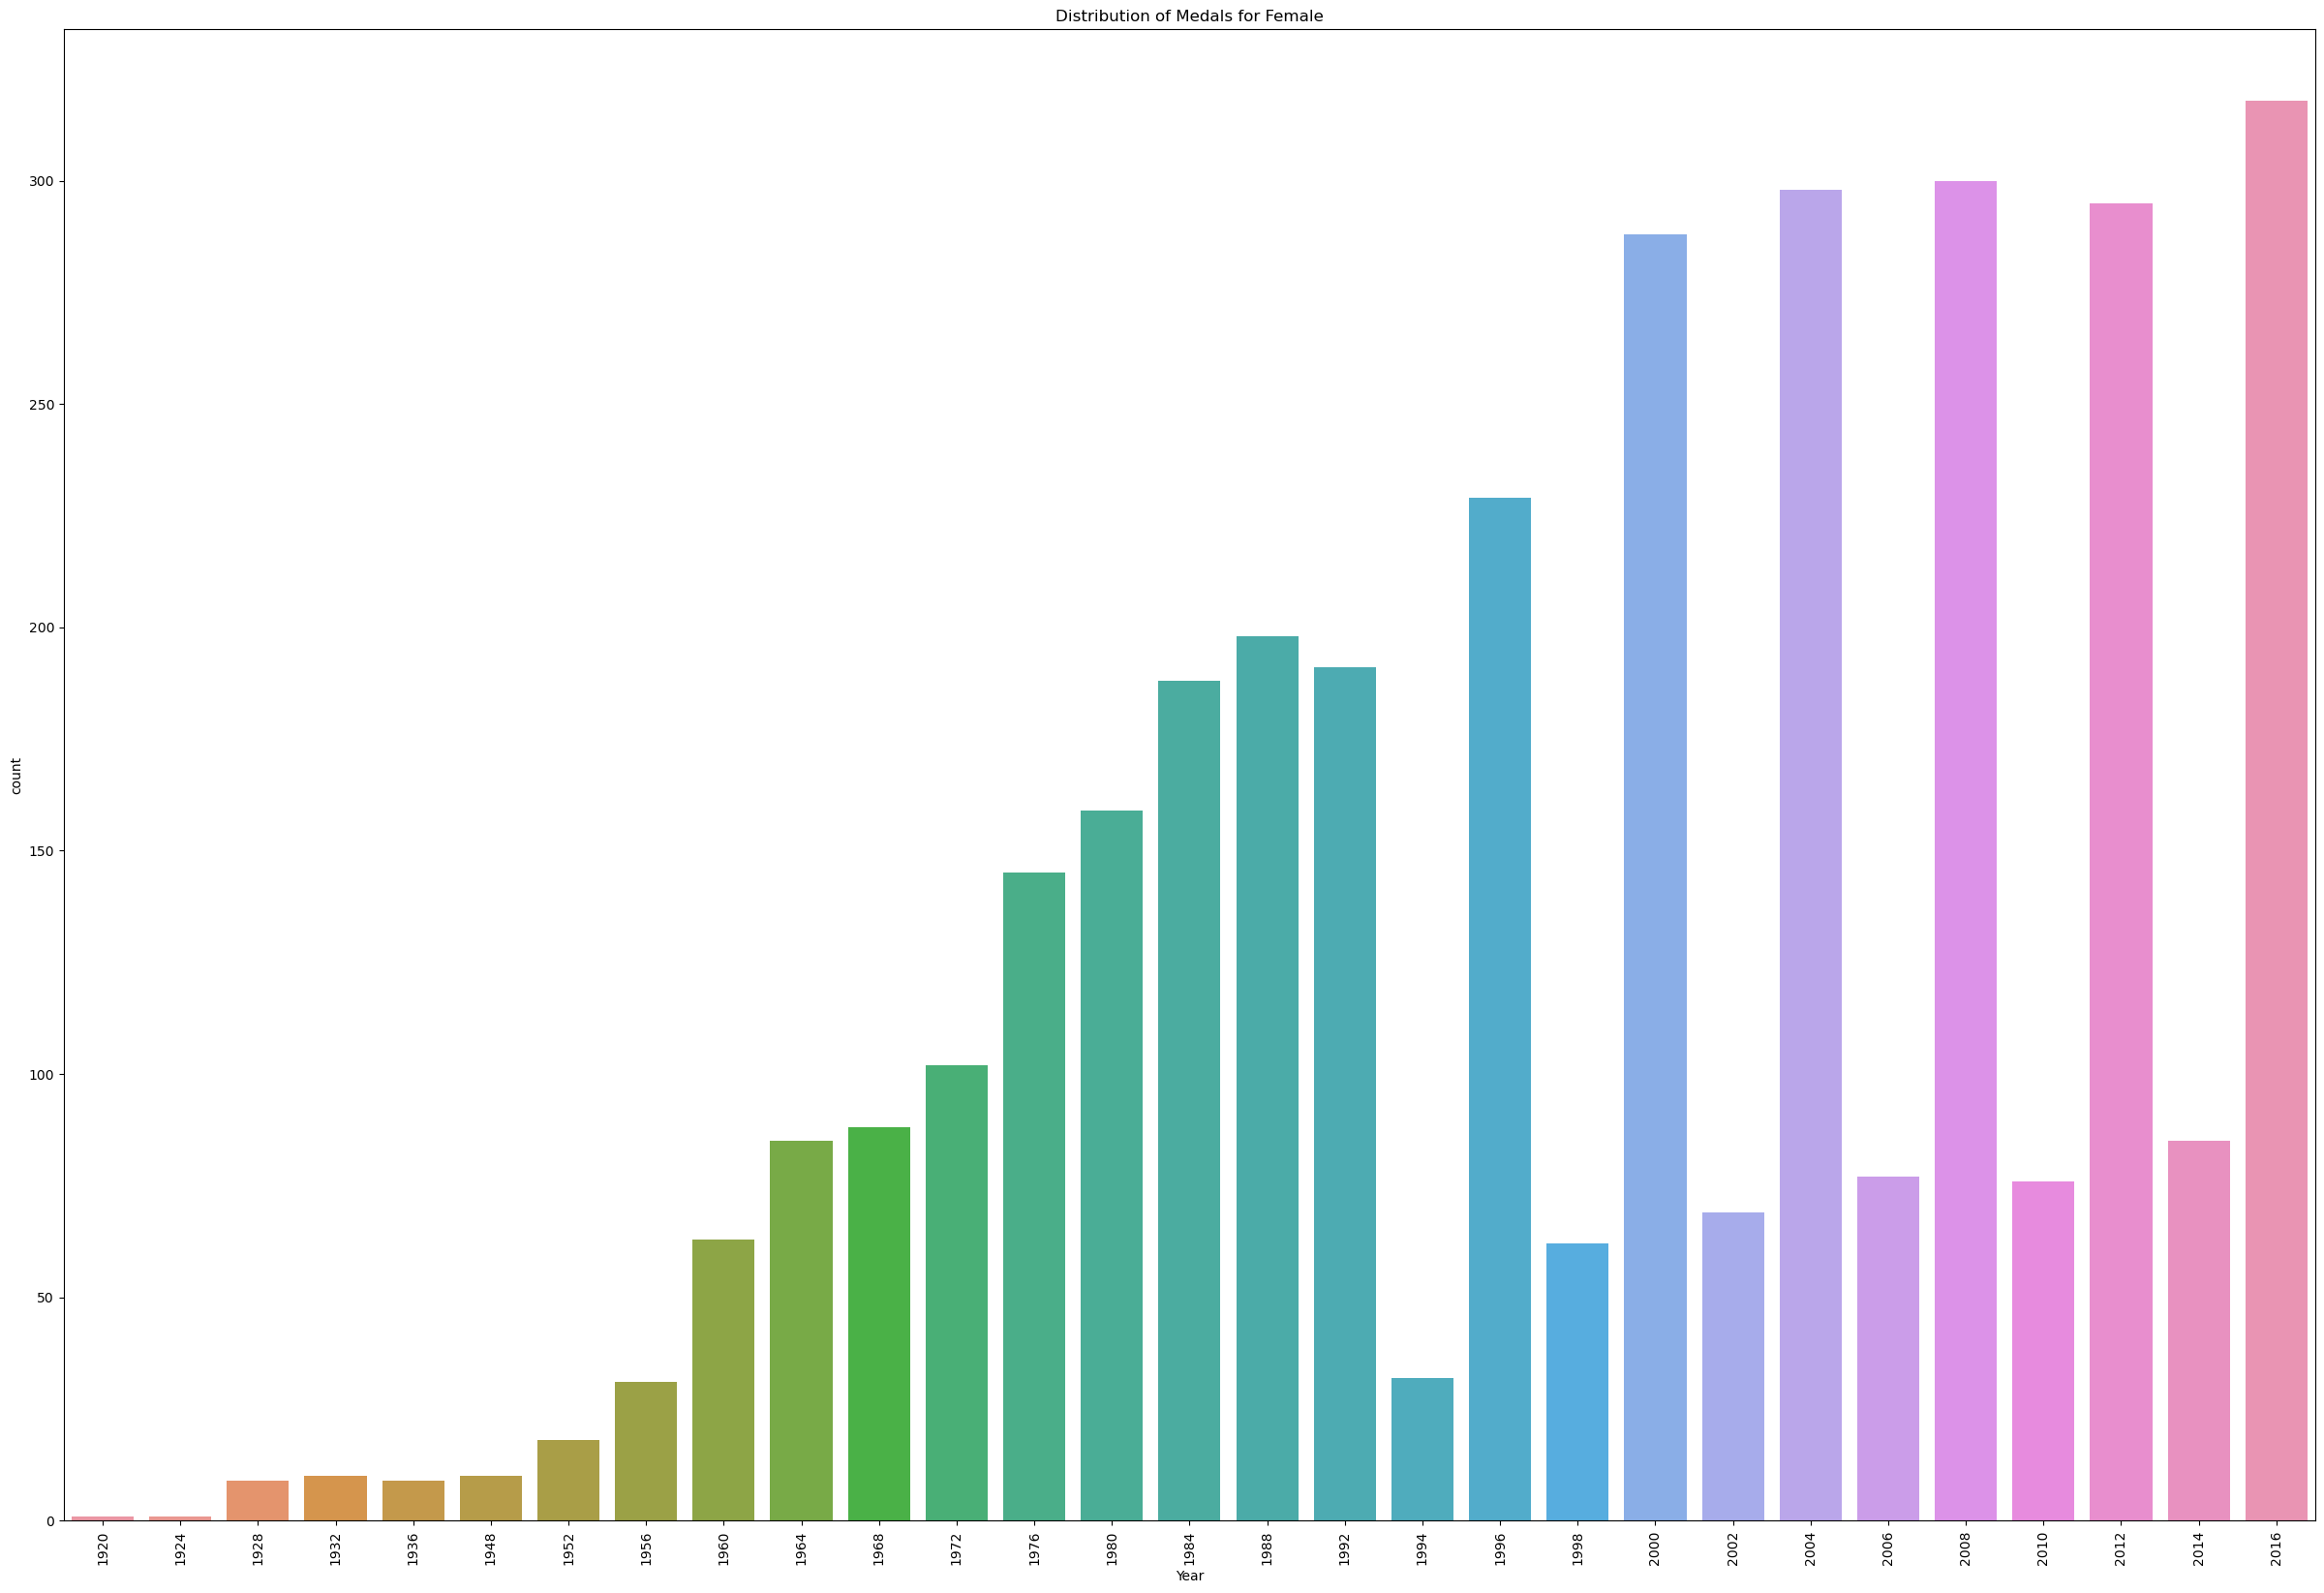

In [56]:
plt.figure(figsize=(30,20))
plt.title('Distribution of Medals for Female')
plt.xticks(rotation=90)
dfhw1fgold = dfhw1f['Year'][(dfhw1f['Medal']=='Gold')]
sns.countplot(dfhw1fgold)

In [57]:
sportsectionyouthr = dfhw1gold['NOC'][(dfhw1gold['Age'] < 30) & (dfhw1gold['Age'] >= 10)]
plt.figure(figsize=(40,30))
plt.tight_layout()
sns.countplot(sportsectionyouthr)
plt.title('youth athletes that won gold medal / regions')
plt.xticks(rotation=90)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


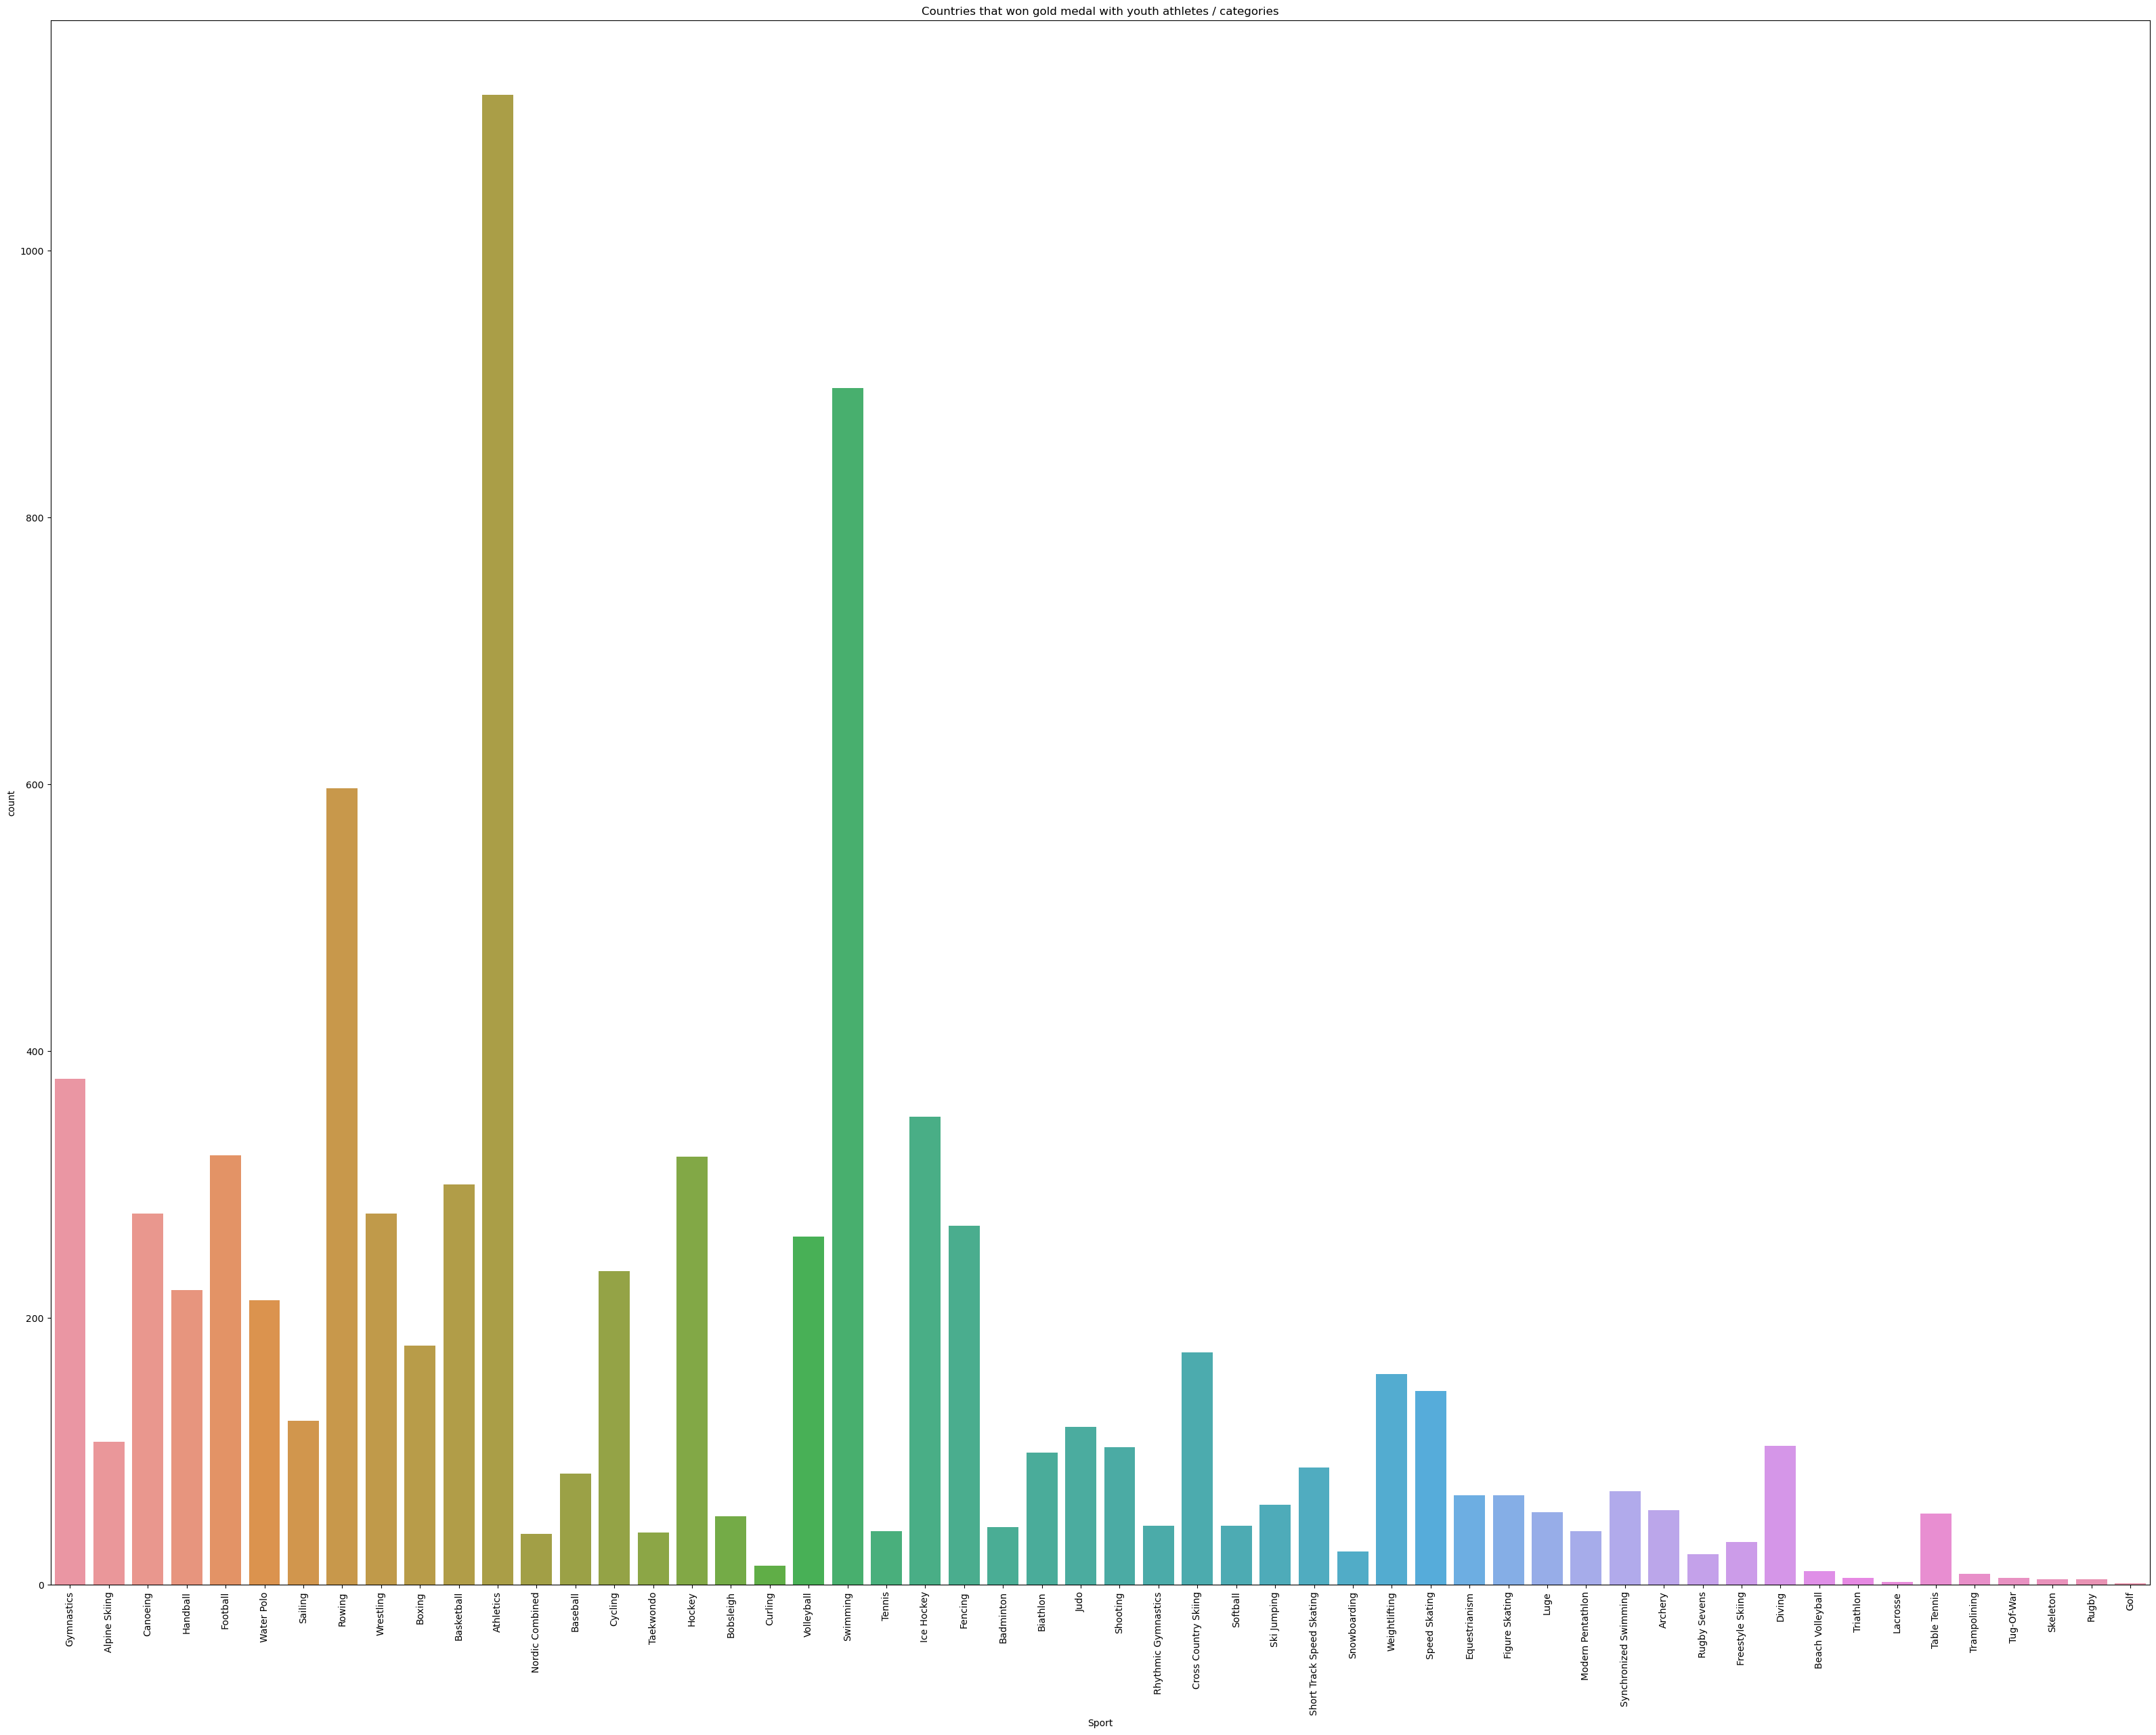

In [58]:
sportsectionyouths = dfhw1gold['Sport'][(dfhw1gold['Age'] < 30) & (dfhw1gold['Age'] >= 10)]
plt.figure(figsize=(40,30))
plt.tight_layout()
sns.countplot(sportsectionyouths)
plt.title('Countries that won gold medal with youth athletes / categories')
plt.xticks(rotation=90)
plt.show()

In [59]:
sportsectionoldg = dfhw1['Sport'][dfhw1['Age'] > 45]
plt.figure(figsize=(40, 30))
plt.tight_layout()
sns.countplot(sportsectionoldg)
plt.title('Countries that won gold medal with old athletes')
plt.xticks(rotation=90)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 4000x2000 with 0 Axes>

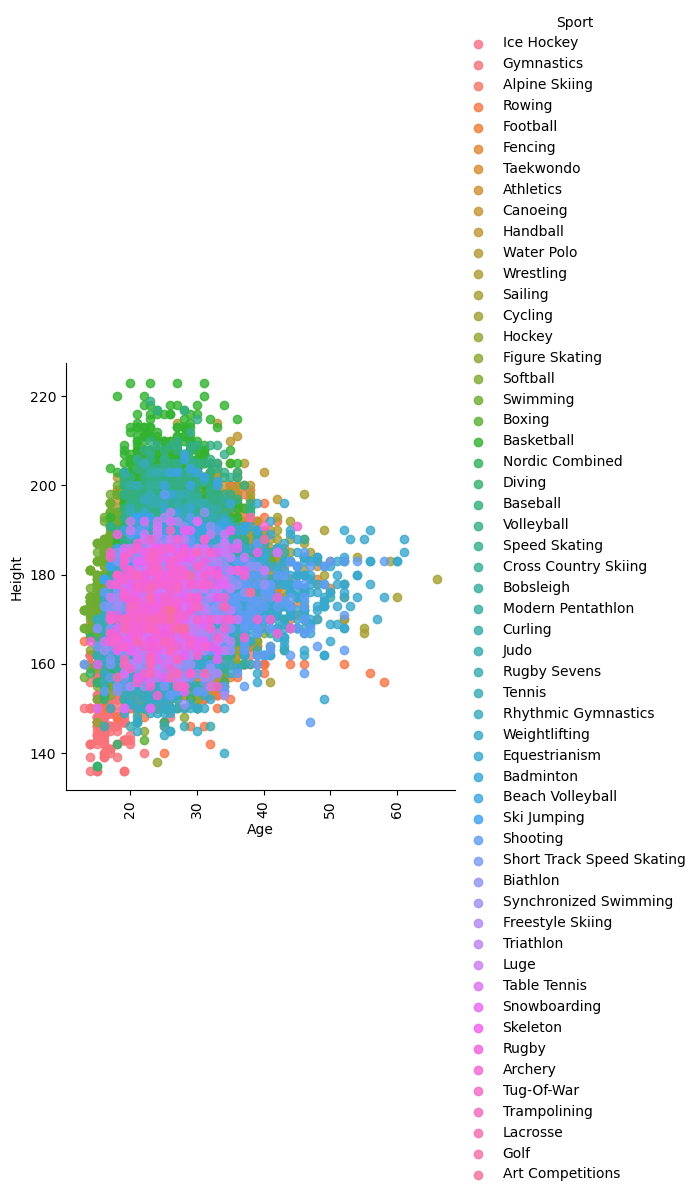

<Figure size 4000x2000 with 0 Axes>

In [71]:
sns.lmplot(x ='Age', y ='Height',
          fit_reg = False, hue = 'Sport',
          data = dfhw1)
plt.xticks(rotation=90)
plt.figure(figsize=(40,20))

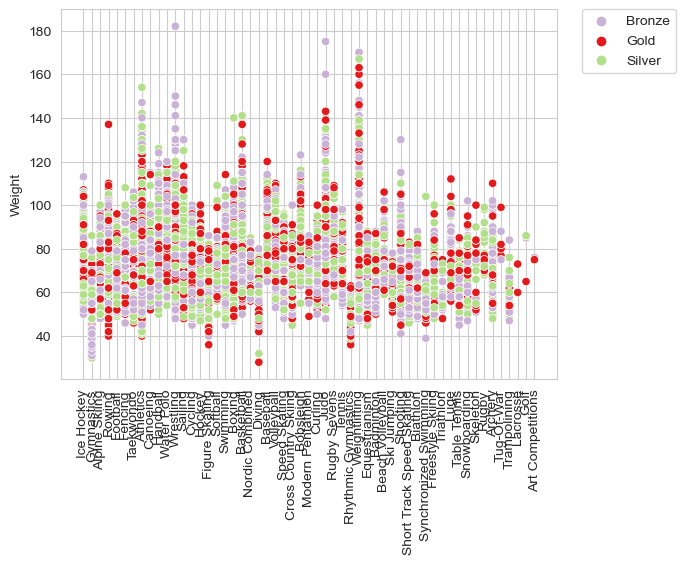

In [83]:
sport_list = dfhw1["Sport"].values.tolist()
sns.set_style(style='whitegrid')
sns.scatterplot(data=dfhw1, x=sport_list, y='Weight', hue='Medal',palette='Paired_r')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=90)
plt.show()

In [89]:
sport_list = dfhw1["Sport"].values.tolist()
sns.set_style(style='whitegrid')
sns.scatterplot(data=dfhw1, x=sport_list, y='Height', hue='Medal',palette='Paired_r')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=90)
plt.show()

In [264]:
mycolors = ["#FF865E", "#FEE440", "#FF830B"]
dfhw1['Medal'].value_counts().plot(kind="pie", title="Title", legend=False, \
                   autopct='%1.1f%%', colors=mycolors,explode=(0, 0, 0), \
                   shadow=True, startangle=90)

<AxesSubplot:title={'center':'Title'}, ylabel='Medal'>

In [135]:
dfhw1basketball = pd.DataFrame()
dfhw1basketball = dfhw1.loc[dfhw1['Sport'].isin(['Basketball'])]

ID                             Name Sex   Age  Height  Weight  \
609    351       Julius Shareef Abdur-Rahim   M  23.0   202.0   104.0   
1029   576  Alejandro "lex" Abrines Redondo   M  23.0   198.0    93.0   
1035   580     Svetlana Olegovna Abrosimova   F  28.0   188.0    77.0   
1807  1000                Dainius Adomaitis   M  26.0   202.0   100.0   
1856  1020     Adriana Aparecida dos Santos   F  25.0   180.0    61.0   

               Team  NOC        Games  Year  Season            City  \
609   United States  USA  2000 Summer  2000  Summer          Sydney   
1029          Spain  ESP  2016 Summer  2016  Summer  Rio de Janeiro   
1035         Russia  RUS  2008 Summer  2008  Summer         Beijing   
1807      Lithuania  LTU  2000 Summer  2000  Summer          Sydney   
1856         Brazil  BRA  1996 Summer  1996  Summer         Atlanta   

           Sport                          Event   Medal  
609   Basketball    Basketball Men's Basketball    Gold  
1029  Basketball    Basketball Men's Basketball  Bronze  
1035  Basketball  Basketball Women's Basketball  Bronze  
1807  Basketball    Basketball Men's Basketball  Bronze  
1856  Basketball  Basketball Women's Basketball  Silver

In [139]:
#Now sorting most attended regions
regions = dfhw1['NOC'].value_counts()
regions.sort_values(ascending=False)
regions.head(5)

USA    4383
URS    2246
GER    1612
AUS    1206
RUS    1134
Name: NOC, dtype: int64

In [142]:
#Total attendance per country/region
plt.figure(figsize=(30,20))
plt.xticks(rotation=90)
plt.title('Most Participation by Country')
sns.barplot(x=regions.index, y=regions, palette = 'Set3');

In [144]:
dfhw1m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19831 entries, 40 to 271082
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      19831 non-null  int64  
 1   Name    19831 non-null  object 
 2   Sex     19831 non-null  object 
 3   Age     19831 non-null  float64
 4   Height  19831 non-null  float64
 5   Weight  19831 non-null  float64
 6   Team    19831 non-null  object 
 7   NOC     19831 non-null  object 
 8   Games   19831 non-null  object 
 9   Year    19831 non-null  int64  
 10  Season  19831 non-null  object 
 11  City    19831 non-null  object 
 12  Sport   19831 non-null  object 
 13  Event   19831 non-null  object 
 14  Medal   19831 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 2.4+ MB


In [146]:
#Total male and female numbers
print(dfhw1m.Sex.value_counts())
print(dfhw1f.Sex.value_counts())

M    19831
Name: Sex, dtype: int64
F    10350
Name: Sex, dtype: int64


<AxesSubplot:title={'center':'Title'}, ylabel='Sex'>

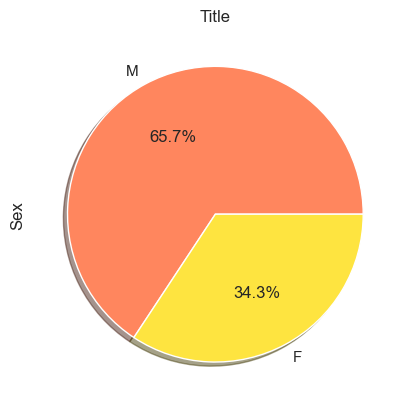

In [268]:
#mycolors1 = ["#FF865E", "#FEE440"]
dfhw1['Sex'].value_counts().plot(kind="pie", title="Title", legend=False, \
                   autopct='%1.1f%%', colors=mycolors1,explode=(0, 0), \
                   shadow=True, startangle=0)

In [155]:
totsport = dfhw1['Sport'].value_counts()
totsport.sort_values(ascending=False)

Athletics                    3648
Swimming                     2486
Rowing                       2104
Ice Hockey                   1301
Hockey                       1168
Gymnastics                   1161
Fencing                      1109
Football                     1084
Canoeing                     1041
Basketball                   1000
Wrestling                     967
Volleyball                    958
Handball                      937
Cycling                       845
Water Polo                    764
Boxing                        708
Cross Country Skiing          687
Sailing                       677
Equestrianism                 663
Shooting                      542
Weightlifting                 532
Judo                          526
Speed Skating                 488
Biathlon                      388
Alpine Skiing                 354
Baseball                      333
Diving                        318
Bobsleigh                     283
Short Track Speed Skating     274
Figure Skating

In [269]:
#Most attended sport categories per athlete 
plt.figure(figsize=(30,20))
plt.xticks(rotation=90)
plt.title('Most Participated Sports in Olympics')
sns.barplot(x=totsport.index, y=totsport, palette = 'Set3');

In [156]:
totmedal = dfhw1['Medal'].value_counts()
totmedal.sort_values(ascending=False)

Gold      10167
Bronze    10148
Silver     9866
Name: Medal, dtype: int64

<AxesSubplot:ylabel='Medal'>

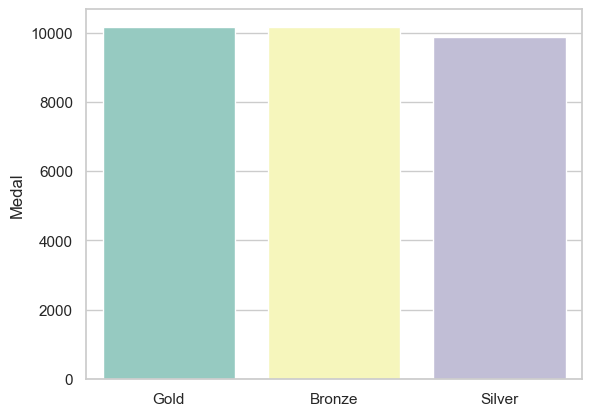

In [230]:
#Total number of medals per categories
i = []
i = dfhw1['Medal'].value_counts()
i
sns.barplot(x=i.index, y=i, palette = 'Set3')

In [221]:
sns.pairplot(dfhw1)

In [272]:
athletemedals = dfhw1[dfhw1["Medal"].notna()]
medals= {'Gold': dfhw1gold,'Silver': dfhw1silver,'Bronze' : dfhw1bronze}
px.histogram(athletemedals, x="NOC", color="Medal",barmode="group")

In [256]:
fig = px.histogram(athletemedals, x="Medal", color="Sex",
             barmode='group', title='Total medals with respect to gender', 
             color_discrete_map={"M": "Green", "F": "Orange"},
             template='simple_white', opacity=1
            )
fig.show()